# Import das bibliotecas
Importação das bibliotecas utilizadas nesse notebook.

In [79]:
#Para operações com dataframes:
import pandas as pd

#Importando a biblioteca para acessar APIs 
import requests
import os

#Para formatar datas:
from datetime import datetime, timedelta

#Visualizações:
import matplotlib.pyplot as plt
import seaborn as sns

#Criação dos subgrupos para cross validation:
from sklearn.model_selection import train_test_split

#Métricas de avaliação do LightGBM e Feature Importance:
import sklearn.metrics
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

#Importar o modelo de ML LightGBM:
import lightgbm as lgb

#Para hipertunagem de parâmetros:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

#Importar regressão logística do Sklearn:
from sklearn.linear_model import LogisticRegression

#Para verificar se modelo Logístico está overfitando:
from sklearn.metrics import plot_roc_curve

#Importar curva ROC AUC do Yellowbrick:
from yellowbrick.classifier import ROCAUC

#Para construção da matriz de confusão e métricas de avaliação da regressão logística:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#Otimização de threshold da regressão logística:
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.datasets import load_spam

# settings to display all columns
pd.set_option("display.max_columns", None)

# Import dos dados
Importação do dataset de Operações Indiretas Automáticas obtido da página do BNDES: https://dadosabertos.bndes.gov.br/dataset/operacoes-financiamento/resource/9534f677-9525-4bf8-a3aa-fd5d3e152a93

Link do CSV: https://dadosabertos.bndes.gov.br/dataset/0f335c85-92a8-4343-9423-f073fb40774e/resource/9534f677-9525-4bf8-a3aa-fd5d3e152a93/download/operacoes-financiamento-operacoes-indiretas-automaticas.csv

In [2]:
df = pd.read_csv('operacoes-financiamento-operacoes-indiretas-automaticas.csv', sep=';')

In [3]:
df.head()

,cliente,cpf_cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,juros,prazo_carencia_meses,prazo_amortizacao_meses,modalidade_de_apoio,forma_de_apoio,produto,instrumento_financeiro,inovacao,area_operacional,setor_cnae,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao_da_operacao
0,BANCO COOPERATIVO SICOOB S.A.,**.*38.232/0001-**,SP,PEDREGULHO,3537008,2002-01-02,16000,"16000,0",RECURSOS LIVRES - TESOURO,TAXA FIXA,"8,75",24,36,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,OUTROS,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0119900,CULT PLANTAS LAVOURA TEMPORARIA NAO ESPECIFICA...,AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO COOPERATIVO SICOOB S.A.,02.038.232.0001-64,LIQUIDADA
1,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,TRES DE MAIO,4321808,2002-01-02,8047,"8047,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0,60,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA
2,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,8104,"8104,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",12,48,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA
3,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,ERECHIM,4307005,2002-01-02,6304,"6304,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",12,48,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA
4,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,HUMAITA,4309704,2002-01-02,15000,"15000,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0,60,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083363 entries, 0 to 2083362
Data columns (total 30 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   cliente                             object
 1   cpf_cnpj                            object
 2   uf                                  object
 3   municipio                           object
 4   municipio_codigo                    int64 
 5   data_da_contratacao                 object
 6   valor_da_operacao_em_reais          int64 
 7   valor_desembolsado_reais            object
 8   fonte_de_recurso_desembolsos        object
 9   custo_financeiro                    object
 10  juros                               object
 11  prazo_carencia_meses                int64 
 12  prazo_amortizacao_meses             int64 
 13  modalidade_de_apoio                 object
 14  forma_de_apoio                      object
 15  produto                             object
 16  instrumento_financ

# Tratamento dos dados
Essa etapa compreendeu o tratamento dos dados para o execução da etapa de Feature Selection e Regressão Logística.

## Criando colunas de tempo e investimentos "inadimplentes"/"liquidados".
Notou-se que haviam colunas com datas de contratação, prazos de amortização e prazos de carência. Essas colunas poderiam ser somadas para obter-se uma data prevista de liquidez do investimento e a partir disso, criar um indicar se o projeto foi ou não liquidado no prazo estimado (dadas as restrições do próprio dataset, já que não foi fornecido a data de liquidez de investimentos já liquidados).

In [5]:
#Transformando a série que está em object para timestamp
df['data_da_contratacao'] = pd.to_datetime(df['data_da_contratacao'])

In [6]:
#Formatando as colunas de meses para realizar a soma na data_prevista
df['prazo_carencia_meses'] = df['prazo_carencia_meses'].astype('timedelta64[M]')
df['prazo_amortizacao_meses'] = df['prazo_amortizacao_meses'].astype('timedelta64[M]')

In [7]:
#Criando uma coluna de previsão do último pagamento
df['data_prevista'] = df['data_da_contratacao'] + df['prazo_carencia_meses'] + df['prazo_amortizacao_meses']
df['data_prevista']

0         2007-01-02 05:06:00
1         2007-01-02 05:06:00
2         2007-01-02 05:06:00
3         2007-01-02 05:06:00
4         2007-01-02 05:06:00
                  ...        
2083358   2026-05-31 05:06:00
2083359   2026-05-31 05:06:00
2083360   2026-05-31 05:06:00
2083361   2025-05-30 23:16:48
2083362   2026-05-31 05:06:00
Name: data_prevista, Length: 2083363, dtype: datetime64[ns]

In [8]:
df['data_prevista'][0]

Timestamp('2007-01-02 05:06:00')

In [9]:
#Encontrando o tempo:
datetime.now()

datetime.datetime(2021, 8, 29, 20, 58, 37, 166153)

In [10]:
df['data_futuro_bool'] = df['data_prevista'] > datetime.now()

In [11]:
#Criando a função:
def Comparador(row):
    if (row['situacao_da_operacao'] == 'LIQUIDADA' and row['data_futuro_bool'] == 1):
        return 'Bom'
    elif (row['situacao_da_operacao'] == 'ATIVA' and row['data_futuro_bool'] == 0):
        return 'Mal'
    else:
        return 'dropa'

In [12]:
#Aplicamos a função:
df['bom_investimento'] = df.apply(Comparador, axis=1)

In [13]:
#Temos três tipos de classificações:
df['bom_investimento'].value_counts()

dropa_bagulho    1997223
Bom                50241
Mal                35899
Name: bom_investimento, dtype: int64

In [14]:
#Filtrando somente os clientes classificados como Bom e Mal:
df = df[~(df['bom_investimento']=='dropa')]

In [15]:
#Checando se só tem Bom e Mal cliente:
df['bom_investimento'].value_counts()

Bom    50241
Mal    35899
Name: bom_investimento, dtype: int64

## Dropando colunas sem uso para ML
Algumas colunas não teriam necessidade para nossa análise.

In [16]:
df = df.drop(columns=['cpf_cnpj', 'cnpj_do_agente_financeiro', 'situacao_da_operacao', 'data_futuro_bool', 'municipio', 'cliente'], errors='ignore')

In [17]:
df.head()

,uf,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,juros,prazo_carencia_meses,prazo_amortizacao_meses,modalidade_de_apoio,forma_de_apoio,produto,instrumento_financeiro,inovacao,area_operacional,setor_cnae,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,data_prevista,bom_investimento
36,RS,4321808,2002-01-02,2303,"2303,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0 days,1460 days 23:16:48,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2006-01-01 23:16:48,Mal
37,RS,4321808,2002-01-02,2303,"2303,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0 days,1460 days 23:16:48,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2006-01-01 23:16:48,Mal
38,RS,4321808,2002-01-02,2373,"2373,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0 days,1460 days 23:16:48,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2006-01-01 23:16:48,Mal
48,RS,4321329,2002-01-02,2400,"2400,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0 days,1095 days 17:27:36,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2005-01-01 17:27:36,Mal
49,RS,4321329,2002-01-02,1700,"1700,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0 days,1095 days 17:27:36,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2005-01-01 17:27:36,Mal


In [18]:
df.head()

,uf,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,juros,prazo_carencia_meses,prazo_amortizacao_meses,modalidade_de_apoio,forma_de_apoio,produto,instrumento_financeiro,inovacao,area_operacional,setor_cnae,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,data_prevista,bom_investimento
36,RS,4321808,2002-01-02,2303,"2303,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0 days,1460 days 23:16:48,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2006-01-01 23:16:48,Mal
37,RS,4321808,2002-01-02,2303,"2303,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0 days,1460 days 23:16:48,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2006-01-01 23:16:48,Mal
38,RS,4321808,2002-01-02,2373,"2373,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0 days,1460 days 23:16:48,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2006-01-01 23:16:48,Mal
48,RS,4321329,2002-01-02,2400,"2400,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0 days,1095 days 17:27:36,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2005-01-01 17:27:36,Mal
49,RS,4321329,2002-01-02,1700,"1700,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,"4,0",0 days,1095 days 17:27:36,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2005-01-01 17:27:36,Mal


## Remover espaços do UF
As unidades federais estavam com espaçamentos antes do primeiro caracter - o mesmo foi retirado.

In [19]:
df['uf'].value_counts().index

Index([' RS', ' SP', ' PR', ' MG', ' SC', ' RJ', ' GO', ' MT', ' BA', ' ES',
       ' MS', ' PA', ' PE', ' MA', ' CE', ' TO', ' DF', ' RO', ' PB', ' PI',
       ' RN', ' AM', ' AL', ' SE', ' AC', ' AP', ' RR'],
      dtype='object')

In [20]:
df['uf'] = df['uf'].apply(lambda x: x.strip())

In [21]:
df['uf'].value_counts().index

Index(['RS', 'SP', 'PR', 'MG', 'SC', 'RJ', 'GO', 'MT', 'BA', 'ES', 'MS', 'PA',
       'PE', 'MA', 'CE', 'TO', 'DF', 'RO', 'PB', 'PI', 'RN', 'AM', 'AL', 'SE',
       'AC', 'AP', 'RR'],
      dtype='object')

## Transformando 'Juros' de Object para Float
Juros estavam com casas decimais expressas com vírgula, transformamos para ponto.

In [22]:
df['juros'] = df['juros'].str.replace(',', '.')
df['juros'] = df['juros'].astype('float')

## Transformando Objects em Category
Transformamos colunas do tipo object em tipo category, já que o LightGBMClassifier só aceitaria esses dados no formato category.

In [23]:
df_categorizado = df.copy(deep=True)

In [24]:
categorical_feats = df_categorizado.select_dtypes(include=['object', 'category']).columns.to_list()
for c in categorical_feats:
    df_categorizado[c] = df_categorizado[c].astype('category')

In [25]:
# Método do Sarit
#for c in X.columns:
#col_type = X[c].dtype
#if col_type == 'object' or col_type.name == 'category':
#X[c] = X[c].astype('category')

## Preparação para o modelo
Preparou-se os dados para o hold out do LightGBMClassifier, formatando-se tipos de dados e substituindo-se alguns caracteres.

In [26]:
#Transformando as vírgulas em pontos na coluna de 'juros':
df_categorizado['valor_desembolsado_reais'] = df_categorizado['valor_desembolsado_reais'].str.replace(',', '.')

#Transformando a coluna 'juros' em float
df_categorizado['valor_desembolsado_reais'] = df_categorizado['valor_desembolsado_reais'].astype('float')

In [27]:
#Transformando o código do município em tipo category:
df_categorizado['município_codigo'] = df_categorizado['municipio_codigo'].astype('category')

In [28]:
#df_categorizado.columns

In [29]:
#Dropando colunas que geram multicolinearidade
df_categorizado = df_categorizado.drop(labels=['data_da_contratacao', 'prazo_carencia_meses',
                                               'prazo_amortizacao_meses', 'data_prevista', 'subsetor_cnae_agrupado', 'subsetor_cnae_codigo'], axis=1, errors='ignore')

## Nulos
Verificada a presença de nulos, os quais eram muito poucos.

<AxesSubplot:>

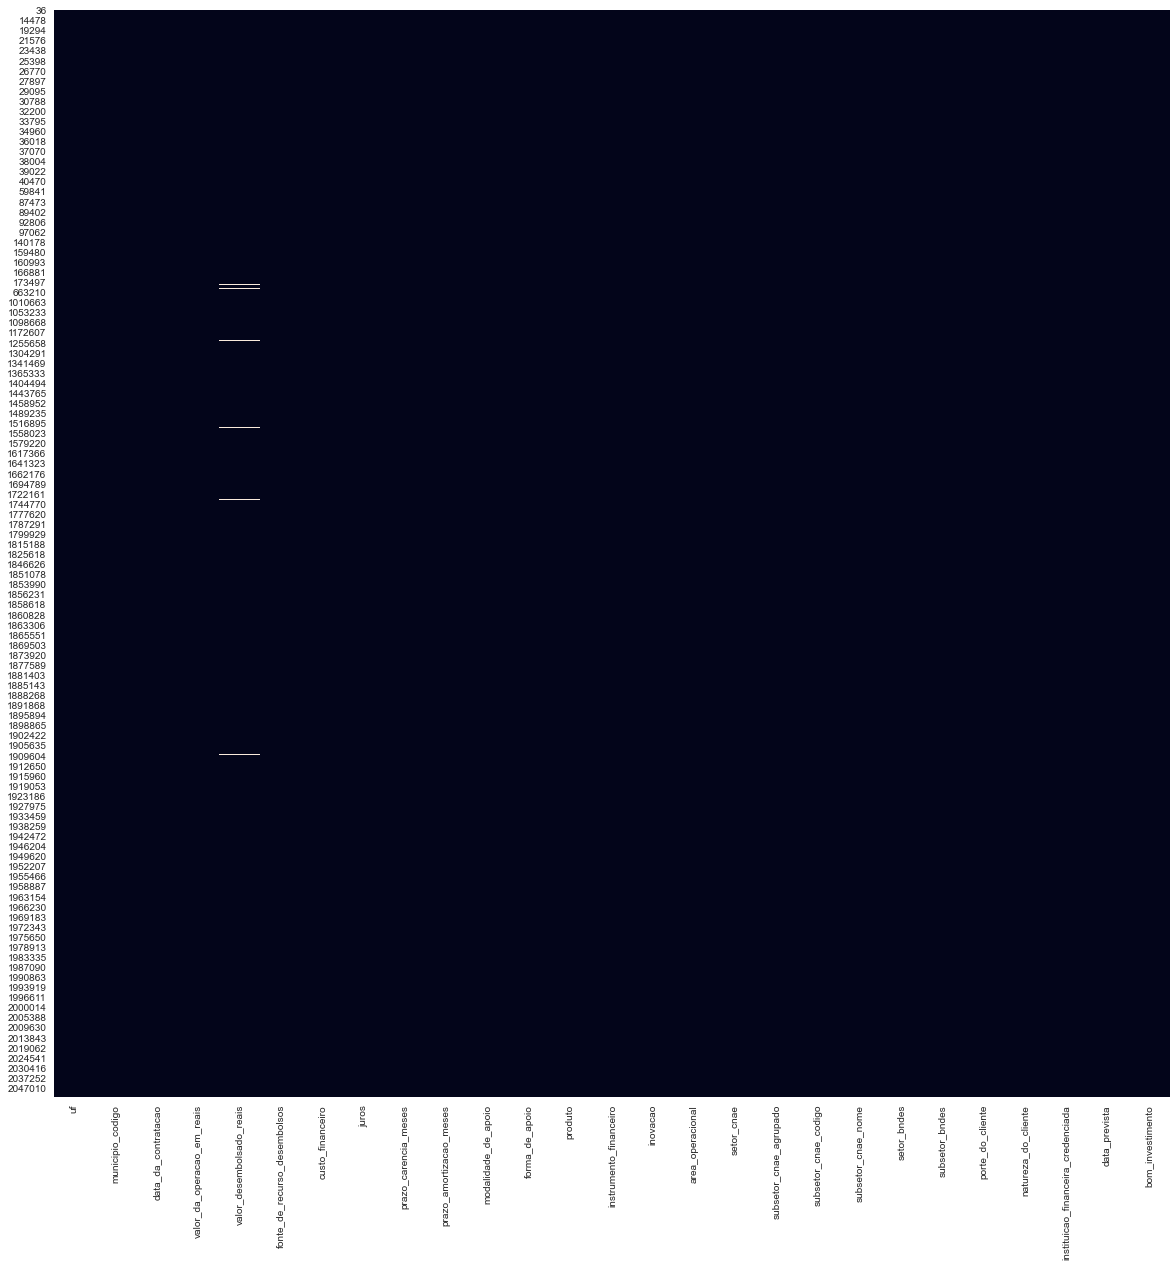

In [30]:
sns.set({'figure.figsize':(20,20)})
sns.heatmap(df.isnull(),cbar=False)

# Hold out
A fim de evitar o overfitting dos dados (e perda de abrangência do modelo), foi realizada a separação dos dados em grupos de treino, teste e validação.

In [31]:
y1 = df_categorizado['bom_investimento'].values
X1 = df_categorizado.drop(columns = 'bom_investimento')

In [32]:
# divide 80% treino_validação e 20% teste
train_val_x, test_x, train_val_y, test_y = train_test_split(X1, y1, test_size=0.2, random_state=101, stratify=y1)
print('Treino & Validação:', train_val_x.shape)
print('Teste:', test_x.shape)

Treino & Validação: (68912, 21)
Teste: (17228, 21)


In [33]:
# divide 80% treino_validação e 20% teste
train_x, val_x, train_y, val_y = train_test_split(train_val_x, train_val_y, test_size=0.2, random_state=101, stratify=train_val_y)
print('Treino:', train_x.shape)
print('Validação:', val_x.shape)

Treino: (55129, 21)
Validação: (13783, 21)


# Feature selection com LightGBMClassifier
Como existiam muitas features / características no dataset, a fim de simplificar o modelo de regressão logística, foi estudada uma maneira de selecionar as features que teriam maior relevância na métrica criada de investimentos "inadimplentes" ou "liquidados".

## Modelagem com LightGBMClassifier
Foi realizada a modelagem com os dados de treino e avaliado com os dados de teste, sendo escolhida a métrica da área sob a curva e F1-Score para uma análise mais balanceada.

In [35]:
#Instanciando o modelo LightGBM:
model = lgb.LGBMClassifier(loss_function= 'Logloss', custom_metric=['Accuracy','AUC'],eval_metric='F1')

In [36]:
model.fit(train_x, train_y, eval_set=(test_x, test_y), feature_name='auto', categorical_feature = 'auto', verbose=50)

[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: custom_metric
[LightGBM] [Warning] Unknown parameter: eval_metric


C:\Users\pfaprado\AppData\Roaming\Python\Python39\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\pfaprado\AppData\Roaming\Python\Python39\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[50]	valid_0's binary_logloss: 0.16739
[100]	valid_0's binary_logloss: 0.148775


LGBMClassifier(custom_metric=['Accuracy', 'AUC'], eval_metric='F1',
               loss_function='Logloss')

In [37]:
print(model)# make predictions

LGBMClassifier(custom_metric=['Accuracy', 'AUC'], eval_metric='F1',
               loss_function='Logloss')


In [38]:
expected_y  = test_y

In [39]:
pred_y = model.predict(test_x)# summarize the fit of the model

In [40]:
print(metrics.classification_report(expected_y, pred_y))

              precision    recall  f1-score   support

         Bom       0.93      0.97      0.95     10048
         Mal       0.96      0.90      0.93      7180

    accuracy                           0.95     17228
   macro avg       0.95      0.94      0.94     17228
weighted avg       0.95      0.95      0.94     17228



In [41]:
print(metrics.confusion_matrix(expected_y, pred_y))

[[9791  257]
 [ 687 6493]]


## Feature Importance
Realizando o feature importance através do LightGBMClassifier, conseguimos eleger um número finito de features (5) mais relevantes para uma regressão logística. Estas features seriam código do munício, subsetor CNAE, instituição financeira credenciada, taxa de juros e instrumento financeiro.

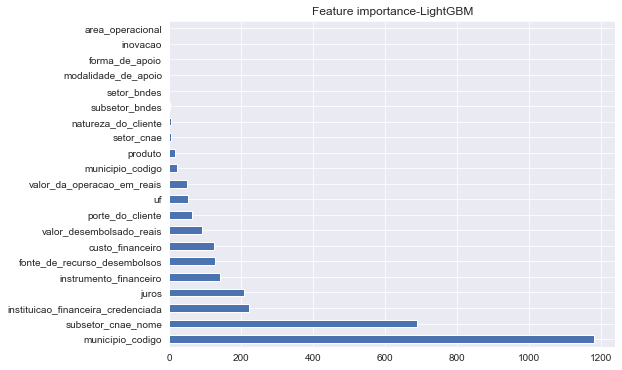

In [42]:
feat_imp = pd.Series(model.feature_importances_, index=X1.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,6))
plt.title('Feature importance-LightGBM')
plt.show()

## Interpretando o Feature Importance
Há grande variabilidade nas categorias (código de munícipio), sendo que a primeira categoria no Pareto tem apenas 3% dos dados. Isso é um bom indicador de que os dados não sofreram overfitting com um munícipio específico e garante uma maior abrangência no modelo.

In [43]:
df_categorizado.municipio_codigo.value_counts()

3550308    2960
3530607    2690
3106200    2143
3304557    1924
4113700    1108
           ... 
3509601       1
2114007       1
2405702       1
4125902       1
1301852       1
Name: municipio_codigo, Length: 3154, dtype: int64

In [44]:
df_categorizado['municipio_codigo'].value_counts().values[0]/df_categorizado['municipio_codigo'].value_counts().sum()

0.034362665428372415

# Logistic Regression
Com as categorias definidas através do LightGBMClassifier, realizou-se o preprocessamento dos dados, como por exemplo "Dummificação" de variáveis categóricas. Afinal todas as variáveis escolhidas para a modelagem da regressão logística eram variáveis categóricas.

## Dumificar variáveis categóricas
Dummificou-se as variáveis categóricas para a modelagem da regressão logística Isso significa que para cada nível de uma variável categórica, foi criada uma coluna no dataset com um valor de 0 ou 1, dependendo se o nível da variável original é aquele sendo avaliado na coluna dumificada.

In [45]:
df.columns

Index(['uf', 'municipio_codigo', 'data_da_contratacao',
       'valor_da_operacao_em_reais', 'valor_desembolsado_reais',
       'fonte_de_recurso_desembolsos', 'custo_financeiro', 'juros',
       'prazo_carencia_meses', 'prazo_amortizacao_meses',
       'modalidade_de_apoio', 'forma_de_apoio', 'produto',
       'instrumento_financeiro', 'inovacao', 'area_operacional', 'setor_cnae',
       'subsetor_cnae_agrupado', 'subsetor_cnae_codigo', 'subsetor_cnae_nome',
       'setor_bndes', 'subsetor_bndes', 'porte_do_cliente',
       'natureza_do_cliente', 'instituicao_financeira_credenciada',
       'data_prevista', 'bom_investimento'],
      dtype='object')

In [46]:
lista_cols = ['municipio_codigo', 'subsetor_cnae_nome', 'juros', 'instituicao_financeira_credenciada', 'instrumento_financeiro']

In [47]:
df['bom_investimento'].replace(to_replace='Bom', value=1, inplace=True)
df['bom_investimento'].replace(to_replace='Mal', value=0, inplace=True)

Como selecionamos só 5 colunas, vamos dropar todas as outras que são variáveis dependentes de 'bom_investimento':

In [48]:
df_escolhido = df.loc[:, ['municipio_codigo', 'subsetor_cnae_nome', 'instituicao_financeira_credenciada', 'instrumento_financeiro', 'bom_investimento']]

In [49]:
# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df_escolhido, columns = ['municipio_codigo', 'subsetor_cnae_nome', 'instituicao_financeira_credenciada', 'instrumento_financeiro'])

In [50]:
df_dummies.shape

(86140, 4289)

In [51]:
df_dummies.columns

Index(['bom_investimento', 'municipio_codigo_1100015',
       'municipio_codigo_1100023', 'municipio_codigo_1100049',
       'municipio_codigo_1100056', 'municipio_codigo_1100064',
       'municipio_codigo_1100072', 'municipio_codigo_1100080',
       'municipio_codigo_1100098', 'municipio_codigo_1100106',
       ...
       'instrumento_financeiro_PRONAMP INVESTIMENTO',
       'instrumento_financeiro_PROPFLORA',
       'instrumento_financeiro_PRÓ-CDD MAÇA',
       'instrumento_financeiro_PSI - BK - Demais Itens',
       'instrumento_financeiro_PSI - BK - Rural',
       'instrumento_financeiro_PSI - BK - Tecnologia Nacional',
       'instrumento_financeiro_PSI - BK - Ônibus e Caminhão',
       'instrumento_financeiro_PSI - Inovação',
       'instrumento_financeiro_PSI - Inovação - BK Eficientes',
       'instrumento_financeiro_TURISMO, COMÉRCIO E SERVIÇOS'],
      dtype='object', length=4289)

## Hold out
A fim de evitar overfitting dos dados, separamos os mesmos em três grupos: treino, teste e validação.

In [52]:
y1 = df_dummies['bom_investimento'].values
X1 = df_dummies.drop(columns = 'bom_investimento')

In [53]:
# divide 80% treino_validação e 20% teste
train_val_x, test_x, train_val_y, test_y = train_test_split(X1, y1, test_size=0.2, random_state=101, stratify=y1)
print('Treino & Validação:', train_val_x.shape)
print('Teste:', test_x.shape)

Treino & Validação: (68912, 4288)
Teste: (17228, 4288)


In [54]:
# divide 80% treino_validação e 20% teste
train_x, val_x, train_y, val_y = train_test_split(train_val_x, train_val_y, test_size=0.2, random_state=101, stratify=train_val_y)
print('Treino:', train_x.shape)
print('Validação:', val_x.shape)

Treino: (55129, 4288)
Validação: (13783, 4288)


In [55]:
#Instanciando o modelo:
logistic = LogisticRegression(max_iter=1000)

In [56]:
#Fitar o modelo
logistic.fit(X=train_x, y=train_y)

LogisticRegression(max_iter=1000)

In [57]:
predictions = logistic.predict(test_x)
pred_y = predictions #prediction

In [58]:
print('Predições:', pred_y.shape)

Predições: (17228,)


In [59]:
#Métricas de avaliação
print("Prediction: ", metrics.accuracy_score(test_y, pred_y))
print("Precision: ", metrics.precision_score(test_y, pred_y))
print("Recall: ", metrics.recall_score(test_y, pred_y))

Prediction:  0.8747968423496634
Precision:  0.8517428902558616
Recall:  0.9508359872611465


In [61]:
#Construir a matriz de confusão:
cnf_matrix = confusion_matrix(test_y, predictions)

In [62]:
#Mostrar a matriz de confusão:
cnf_matrix

array([[5517, 1663],
       [ 494, 9554]], dtype=int64)

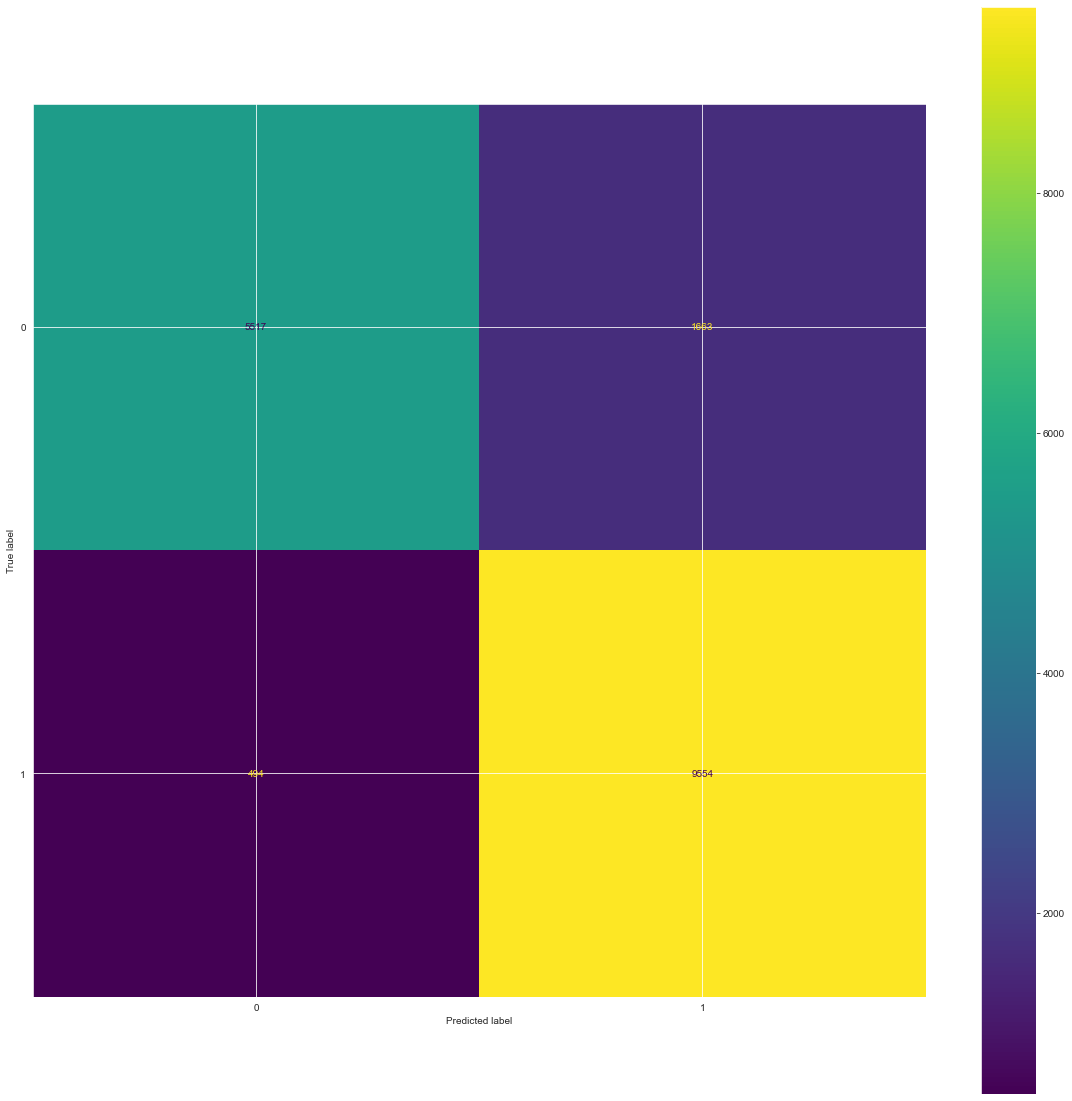

In [63]:
plot_confusion_matrix(logistic, test_x, test_y, values_format='.0f')

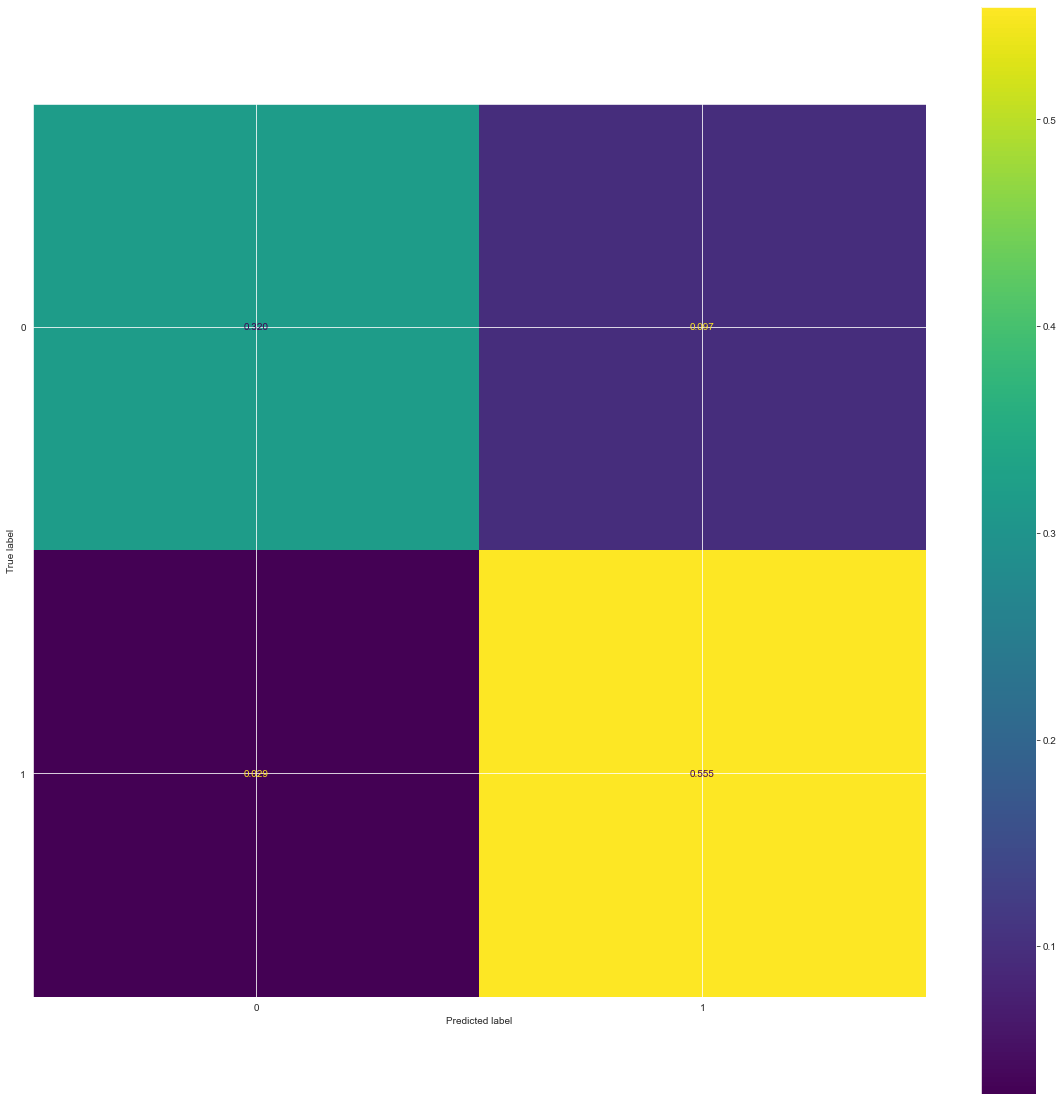

In [64]:
plot_confusion_matrix(logistic, test_x, test_y, values_format='.3f', normalize='all')

# Otimização de Threshold
Podemos otimizar o threshold, que por default é 0.5. Esses valores podem aumentar/diminuir a precisão ou recall, dependendo do objetivo de negócio (perfil mais permissivo ou perfil mais conservador na análise de investimentos). Ou ainda temos um perfil equilibrado com threshold 0,43 (F1-Score máximo).

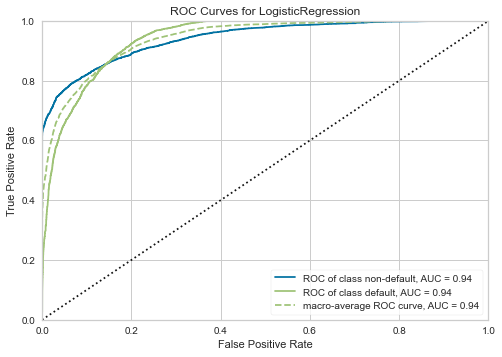

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [65]:
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(logistic, classes=["non-default", "default"], micro=False, per_class=True)
visualizer.fit(train_x, train_y)        # Fit the training data to the visualizer
visualizer.score(test_x, test_y)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure


c:\users\pfaprado\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\pfaprado\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\pfaprado\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


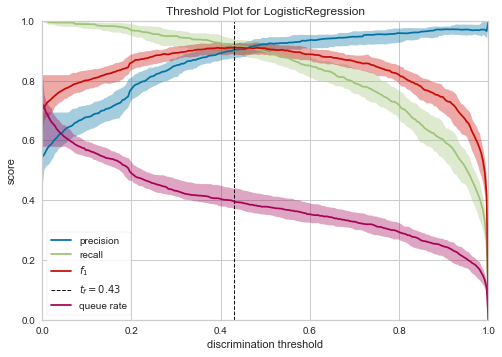

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [67]:
# Load a binary classification dataset
X1, y1 = load_spam()

# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(X1, y1)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Hipertunagem de parâmetros do modelo de Regressão Logística
Ainda foi possível realizar uma hipertunagem dos parâmetros do modelo de regressão logísitca através do grid_search, alimentado-se ao espaço amostral valores de C e retornando-se o melhor estimador, nesse caso C = 2.

In [121]:
model = LogisticRegression()

In [ ]:
search_space = [{
    'C': [0.1,0.2,0.5, 0.6, 0.8, 0.9, 1, 2, 4, 6]
}]

In [122]:
grid_search = GridSearchCV(model, 
                           search_space, 
                           cv=KFold(3), 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           verbose=True)

In [ ]:
grid_search.fit(train_x, train_y)

In [ ]:
grid_search.best_estimator_

O best estimator retornado é C=2.

# Simulação com uma entrada
Com o modelo criado e utilizando threshold padrão de 0.5, fizemos uma simulação para verificar o funcionamento, retornado a previsão observada.

In [93]:
predictions = logistic.predict(val_x.head(1))
pred_val_y = predictions #prediction

Valor predito:

In [99]:
pred_val_y[0]

1

Valor real:

In [97]:
val_y[1]

1

Dataframe real:

In [92]:
val_x.head(1)

,municipio_codigo_1100015,municipio_codigo_1100023,municipio_codigo_1100049,municipio_codigo_1100056,municipio_codigo_1100064,municipio_codigo_1100072,municipio_codigo_1100080,municipio_codigo_1100098,municipio_codigo_1100106,municipio_codigo_1100114,municipio_codigo_1100122,municipio_codigo_1100130,municipio_codigo_1100148,municipio_codigo_1100155,municipio_codigo_1100189,municipio_codigo_1100205,municipio_codigo_1100254,municipio_codigo_1100288,municipio_codigo_1100304,municipio_codigo_1100320,municipio_codigo_1100338,municipio_codigo_1100379,municipio_codigo_1100452,municipio_codigo_1100809,municipio_codigo_1100924,municipio_codigo_1100940,municipio_codigo_1101104,municipio_codigo_1101203,municipio_codigo_1101302,municipio_codigo_1101468,municipio_codigo_1101484,municipio_codigo_1200104,municipio_codigo_1200203,municipio_codigo_1200302,municipio_codigo_1200344,municipio_codigo_1200401,municipio_codigo_1200450,municipio_codigo_1200500,municipio_codigo_1200609,municipio_codigo_1300086,municipio_codigo_1301209,municipio_codigo_1301308,municipio_codigo_1301704,municipio_codigo_1301852,municipio_codigo_1301902,municipio_codigo_1302405,municipio_codigo_1302504,municipio_codigo_1302603,municipio_codigo_1302702,municipio_codigo_1302900,municipio_codigo_1303809,municipio_codigo_1400100,municipio_codigo_1400209,municipio_codigo_1400472,municipio_codigo_1500107,municipio_codigo_1500206,municipio_codigo_1500305,municipio_codigo_1500503,municipio_codigo_1500602,municipio_codigo_1500800,municipio_codigo_1500859,municipio_codigo_1501303,municipio_codigo_1501402,municipio_codigo_1501501,municipio_codigo_1501709,municipio_codigo_1501782,municipio_codigo_1502152,municipio_codigo_1502202,municipio_codigo_1502301,municipio_codigo_1502400,municipio_codigo_1502707,municipio_codigo_1502905,municipio_codigo_1502939,municipio_codigo_1503200,municipio_codigo_1503309,municipio_codigo_1503457,municipio_codigo_1503606,municipio_codigo_1503705,municipio_codigo_1503903,municipio_codigo_1504059,municipio_codigo_1504208,municipio_codigo_1504422,municipio_codigo_1504703,municipio_codigo_1504901,municipio_codigo_1504976,municipio_codigo_1505031,municipio_codigo_1505064,municipio_codigo_1505304,municipio_codigo_1505437,municipio_codigo_1505486,municipio_codigo_1505502,municipio_codigo_1505536,municipio_codigo_1505635,municipio_codigo_1506138,municipio_codigo_1506161,municipio_codigo_1506187,municipio_codigo_1506500,municipio_codigo_1506583,municipio_codigo_1506609,municipio_codigo_1506708,municipio_codigo_1506807,municipio_codigo_1507003,municipio_codigo_1507755,municipio_codigo_1507953,municipio_codigo_1507979,municipio_codigo_1508001,municipio_codigo_1508084,municipio_codigo_1508100,municipio_codigo_1508126,municipio_codigo_1508407,municipio_codigo_1600279,municipio_codigo_1600303,municipio_codigo_1600535,municipio_codigo_1600600,municipio_codigo_1600808,municipio_codigo_1700400,municipio_codigo_1700707,municipio_codigo_1701101,municipio_codigo_1702000,municipio_codigo_1702109,municipio_codigo_1702208,municipio_codigo_1702554,municipio_codigo_1703008,municipio_codigo_1703057,municipio_codigo_1703842,municipio_codigo_1703909,municipio_codigo_1705102,municipio_codigo_1705508,municipio_codigo_1706001,municipio_codigo_1706100,municipio_codigo_1706506,municipio_codigo_1707009,municipio_codigo_1707652,municipio_codigo_1708205,municipio_codigo_1709302,municipio_codigo_1709500,municipio_codigo_1711902,municipio_codigo_1712504,municipio_codigo_1712702,municipio_codigo_1713205,municipio_codigo_1713601,municipio_codigo_1714880,municipio_codigo_1715002,municipio_codigo_1715259,municipio_codigo_1715705,municipio_codigo_1715754,municipio_codigo_1716109,municipio_codigo_1716505,municipio_codigo_1716604,municipio_codigo_1716703,municipio_codigo_1717206,municipio_codigo_1717800,municipio_codigo_1718204,municipio_codigo_1718402,municipio_codigo_1720903,municipio_codigo_1720978,municipio_codigo_1721000,municipio_codigo_1721208,municipio_codigo_1722081,municipio_codigo_1722107

In [100]:
df.head(1)

,uf,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,juros,prazo_carencia_meses,prazo_amortizacao_meses,modalidade_de_apoio,forma_de_apoio,produto,instrumento_financeiro,inovacao,area_operacional,setor_cnae,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,data_prevista,bom_investimento
36,RS,4321808,2002-01-02,2303,"2303,0",RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,4.0,0 days,1460 days 23:16:48,REEMBOLSÁVEL,INDIRETA,BNDES AUTOMÁTICO,PRONAF INVESTIMENTO,NÃO,AREA DE OPERACOES E CANAIS DIGITAIS,AGROPECUÁRIA E PESCA,Agropecuária,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,2006-01-01 23:16:48,0
